In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [7]:
import matplotlib.pyplot as plt

#**Modelos analíticos**

## **1. Definición de Objetivo:**

El objetivo es crear un modelo de machine learning que pueda predecir la cantidad de propina (tip) en función de las características disponibles en el conjunto de datos.

## **2. Contexto comercial**

El restaurante desea comprender mejor cómo las características como el monto de la cuenta, el día de la semana, el género del cliente, si es fumador o no, y el tamaño de la mesa influyen en la cantidad de propina que se recibe. Esto puede ayudar al restaurante a tomar decisiones estratégicas para mejorar su servicio y maximizar las propinas.

## **3.Problema Comercial:**

El restaurante enfrenta el desafío de maximizar las propinas que reciben sus camareros y camareras. El problema comercial es predecir cuánta propina se puede esperar recibir en función de diversas variables, lo que podría ayudar a mejorar la satisfacción de los clientes y la eficiencia del servicio.

## **4. Data Acquisition (Adquisición de Datos):**

Cargar el conjunto de datos de "tips" de Seaborn:

In [2]:
#Cargar dataset
tips_data = sns.load_dataset("tips")

## **5. EDA (Análisis Exploratorio de Datos):**


Explorar y visualizar los datos:

In [3]:
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


*   **Medidas** = total_bill; tip; size
*   **Dimensiones** = tip,	sex,	smoker,	day,	time

##### Explorar y visualizar datos

In [4]:
print("Estructura de datos:", tips_data.shape )
tips_data.info()


Estructura de datos: (244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
#Análisis descriptivo
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


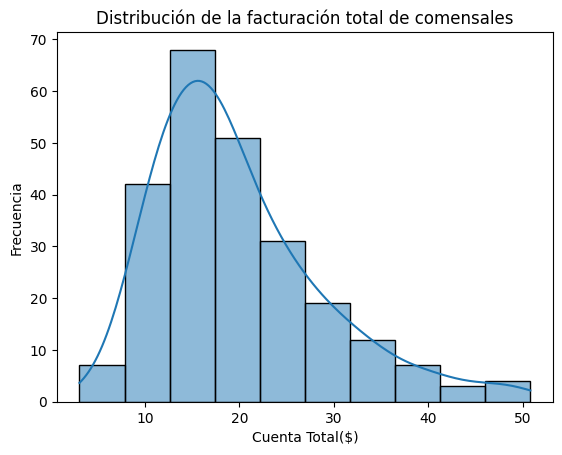

In [8]:
#Crear Histograma
sns.histplot(tips_data['total_bill'], bins=10, kde=True) #bins = contenedores / cantidad de columnas

#Contextualización del gráfico
plt.title("Distribución de la facturación total de comensales")
plt.xlabel("Cuenta Total($)")
plt.ylabel("Frecuencia")
plt.show()

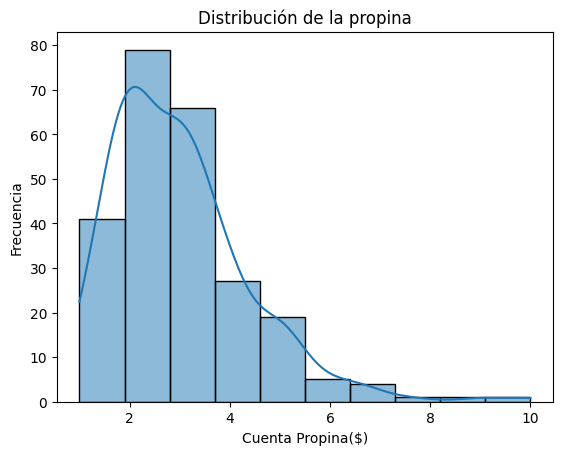

In [9]:
#Crear Histograma
sns.histplot(tips_data['tip'], bins=10, kde=True) #bins = contenedores / cantidad de columnas

#Contextualización del gráfico
plt.title("Distribución de la propina")
plt.xlabel("Cuenta Propina($)")
plt.ylabel("Frecuencia")
plt.show()

##### Observaciones: Ambas distribuciones son sesgadas, no son simétricas

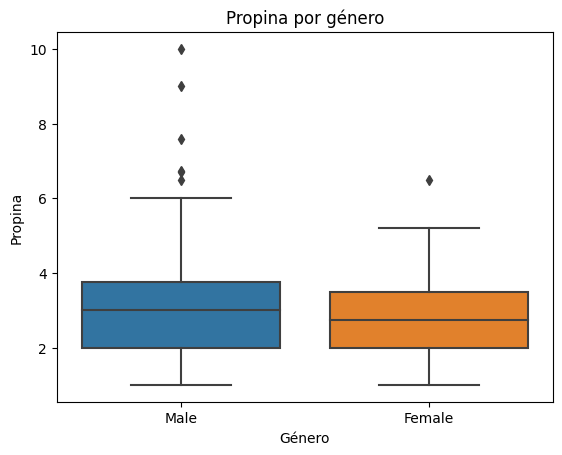

In [10]:
#Boxplot
sns.boxplot(x="sex", y="tip", data=tips_data)

#Contextualización del gráfico
plt.title("Propina por género")
plt.xlabel("Género")
plt.ylabel("Propina")
plt.show()

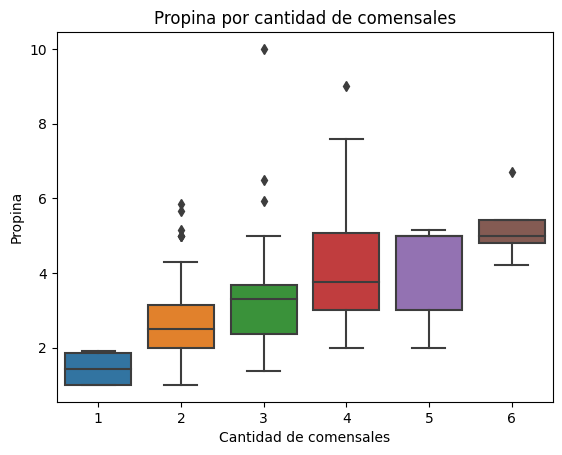

In [11]:
#Boxplot
sns.boxplot(x="size", y="tip", data=tips_data)

#Contextualización del gráfico
plt.title("Propina por cantidad de comensales")
plt.xlabel("Cantidad de comensales")
plt.ylabel("Propina")
plt.show()

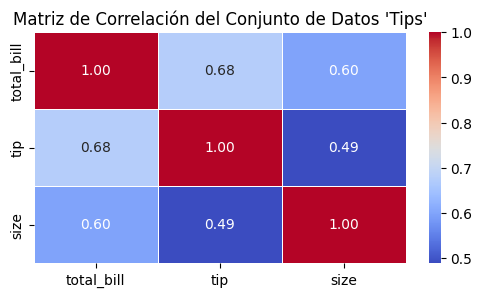

In [12]:
correlation_matrix = tips_data.corr(numeric_only=True)

# Crear una visualización de la matriz de correlación
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación del Conjunto de Datos 'Tips'")
plt.show()

## **6. Data Wrangling**

In [13]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
etiquetas_time= tips_data['time'].unique()
print(etiquetas_time)

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [15]:
tips_data['sex'] = tips_data['sex'].map({'Male': 0, 'Female': 1})
tips_data['smoker'] = tips_data['smoker'].map({'No': 0, 'Yes': 1})
tips_data['time'] = tips_data['time'].map({'Dinner': 0, 'Lunch': 1})

## **7. Selección del algoritmo**

In [16]:
#Delimitar variables
X = tips_data[['total_bill', 'size', 'sex', 'smoker','time']]
y = tips_data['tip']

In [17]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()
# Inicializar el selector de características hacia adelante
sfs = SFS(model,
          k_features='best',  # Seleccionar el mejor conjunto de características
          forward=True,       # Seleccionar hacia adelante
          scoring='neg_mean_squared_error',  # Métrica a optimizar (error cuadrático medio negativo)
          cv=5)               # Cantidad de folds 5

# Hacemos el fit con entrenamiento
sfs.fit(X_train, y_train)

# Obtener índices de características seleccionadas
selected_feature_indices = sfs.k_feature_idx_

# Obtener las características seleccionadas
selected_features = X.columns[list(selected_feature_indices)]
print("Selected Features:", selected_features)

Selected Features: Index(['total_bill', 'smoker'], dtype='object')


## **8.Desarrollo del algoritmo de Machine Learning**

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Entrenar el modelo en el conjunto de entrenamiento con las características seleccionadas
model.fit(X_train_selected, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_selected)

## **9. Validación y despliegue**

In [20]:
#Validación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#imprimimos los resultados

print("Resultado mse:", mse )
print("Resultado rmse:", rmse)
print("Resultado mae:", mae )
print("Resultado r2:", r2)

Resultado mse: 0.6295563314537095
Resultado rmse: 0.793445859182408
Resultado mae: 0.636317118485517
Resultado r2: 0.49634338912280385
